<a href="https://colab.research.google.com/github/mariap13/CMSC320-FinalProject/blob/main/CMSC320_Final_Project_MP_KRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Baltimore City Crime Data
Fall 2024 Data Science Project
Maria Pacheco, Kelly Turner
### Contributions:
* *Project Idea:* Kelly Turner
* *Dataset Curation and Preprocessing:* Kelly Turner, Maria Pacheco
* *Data Exploration and Summary Statistics:* Kelly Turner, Maria Pacheco
* *ML Algorithm Design/Development:* Maria Pacheco, Kelly Turner
* *ML Algorithm Training and Test Data Analysis:*
* *Visualization, Result Analysis, Conclusion:*
* *Final Tutorial Report Creation:*
* *Additional:*

## Introduction
Crime is a big concern for many communities, and understanding where and why it happens can make a huge difference. For our project, we are diving into Baltimore’s crime data to tackle two main questions: (1) Do certain types of crimes happen more often in specific parts of Baltimore? (2) Based on past trends, can we use machine learning to predict if crime rates might go up or down in the future?

Our aim with this project is to reveal trends in major crimes committed in Baltimore City and explore how factors like the type of crime, the location of incidents, and the gender of the perpetrators influence the frequency of crime. These insights can help leaders and law enforcement focus their efforts where they are needed most. If we can predict future trends, we might even be able to help prevent some crimes before they happen. With this analysis, we hope to shine a light on patterns in the data and provide useful insights for making Baltimore a safer place for everyone. <br />





## Data Curation
The data for our project comes from the Baltimore City open data portal API, specifically the Part 1 Crime Data dataset which can be found at the following link: https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/about.<br>This dataset provides detailed information about major crimes (homicide, shootings, robbery, aggravated assault, etc.) committed within the City of Baltimore. It includes details such as the type of crime, location, date, and other characteristics, and is updated weekly to ensure accuracy and relevance.<br><br>Link to data (crime code, inside_outside, location, total_incidents columns not included): https://services1.arcgis.com/UWYHeuuJISiGmgXx/arcgis/rest/services/Part1_Crime_Beta/FeatureServer/0/query?where=1%3D1&outFields=CrimeDateTime,Description,Weapon,Post,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,CCNumber&outSR=4326&f=geojson
<br><strong>Please download the CSV file under download. (file is too large to place in repo)<strong>

## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# CODE FOR READING DATA INTO CSV FILE
#df = pd.read_csv('/content/Part1_Crime_Beta_5960161298247612570.csv', on_bad_lines='skip')
df = pd.read_csv('/content/Part1_Crime_Beta_5960161298247612570.csv', on_bad_lines='skip')
pd.options.display.max_columns = None
df.info()

<ipython-input-3-0c50f3e4a2fb>:3: DtypeWarning: Columns (5,7,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Part1_Crime_Beta_5960161298247612570.csv', on_bad_lines='skip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257984 entries, 0 to 257983
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            257984 non-null  int64  
 1   CCNumber         257984 non-null  object 
 2   CrimeDateTime    257983 non-null  object 
 3   CrimeCode        257983 non-null  object 
 4   Description      257983 non-null  object 
 5   Inside_Outside   41291 non-null   object 
 6   Weapon           70457 non-null   object 
 7   Post             255233 non-null  object 
 8   Gender           223552 non-null  object 
 9   Age              211776 non-null  float64
 10  Race             235221 non-null  object 
 11  Ethnicity        86358 non-null   object 
 12  Location         256924 non-null  object 
 13  Old_District     189021 non-null  object 
 14  New_District     66239 non-null   object 
 15  Neighborhood     254872 non-null  object 
 16  Latitude         257141 non-null  floa

In [4]:
pd.options.display.max_columns = None
df.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,1,14F04840,6/11/2014 12:00:00 AM,3AF,ROBBERY,NaN,FIREARM,425.0,F,18.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3200 EVERGREEN AVE,NORTHEAST,NaN,GLENHAM-BELHAR,39.351694,-76.557490,"(39.351694207058941,-76.557489518131391)",STREET,1.0,-76.557490,39.351694
1,2,14F05283,6/11/2014 8:15:00 PM,3AF,ROBBERY,NaN,FIREARM,125.0,M,25.0,BLACK_OR_AFRICAN_AMERICAN,NaN,800 PENNSYLVANIA AVE,CENTRAL,NaN,SETON HILL,39.296319,-76.625853,"(39.296319484108885,-76.625852618576189)",PARKING LOT-OUTSIDE,1.0,-76.625853,39.296319
2,3,14F05597,6/11/2014 7:00:00 AM,5A,BURGLARY,NaN,NaN,425.0,F,28.0,WHITE,NaN,3800 MAYBERRY AVE,NORTHEAST,NaN,ROSEMONT EAST,39.354467,-76.539028,"(39.354466908808519,-76.539028348428062)",YARD,1.0,-76.539028,39.354467
3,4,14F05409,6/11/2014 8:30:00 PM,6D,LARCENY FROM AUTO,NaN,NaN,413.0,M,39.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1400 KITMORE RD,NORTHEAST,NaN,NEW NORTHWOOD,39.350889,-76.592198,"(39.350888883190123,-76.592198301257767)",STREET,1.0,-76.592198,39.350889
4,5,14F05185,6/11/2014 6:00:00 PM,3AO,ROBBERY,NaN,OTHER,312.0,M,44.0,WHITE,NaN,1900 N WOLFE ST,EASTERN,NaN,SOUTH CLIFTON PARK,39.312639,-76.591998,"(39.31263916043337,-76.591997914137522)",STADIUM,1.0,-76.591998,39.312639


### Description of the Crime Data columns:
*   `RowID` - The unique ID for each entry in the dataset
*   `CCNumber` -
*   `CrimeCode` - The police Crime Code assigned to the crime
*   `Description` - The type of crime that was committed
*   `Inside_Outside` - Describes whether the crime occured indoors or outdoors
*   `Weapon` - Described what weapon was used, if any, in the crime
*   `Post` - The police post area the crime occured in
*   `Gender` - The gender ('Female', 'Male', 'Undefined') of the perpetrator
*   `Age` - The age of the perpetrator
*   `Race` - The race of the perpetrator
*   `Ethnicity` - The ethnicity of the perpetrator
*   `Location` - The address of the crime
*   `Old_District` - The district where the crime occured, according to the system used by Baltimore city before July 2023
*   `New_District` - The district where the crime occured, according to the system used by Baltimore city after July 2023
*   `Neighborhood` - The neighborhood where the crime occured
*   `Latitude` - Latitude coordinate of the crime location
*   `Longitude` - Longitude coordinate of the crime location
*   `GeoLocation` - Coordinates of the crime location to be used by ArcGIS
*   `PremiseType` - Brief description of the setting where the crime occured, for example, "Convenience store"
*   `Total_Incidents` - The number of incidents covered by the entry (this is '1' for every entry)




## Data Parsing



The 'Age' column was set to integers from float values, and the frequencies of all unique ages in the column were printed to display the distribution of ages. The null ('None') values in the Age column were set to zero, and going forward we didn't include these zeroes in calculations on age distribution.

In [5]:
# Print number of records with null 'Age' values
print("Null values in the 'Age' column:", df['Age'].isna().sum(), "\tPercentage of records with null age:", df['Age'].isna().sum()/len(df['Age']))

# Create another version of the dataset with null ages replaced with 0
existing_ages = df.copy()
existing_ages['Age'] = existing_ages['Age'].fillna(0)
# Convert all records in Age column to positive integers
existing_ages['Age'] = existing_ages['Age'].astype(int).abs()
# Look at the frequency of each age
print(existing_ages['Age'].value_counts().sort_index())
# Using this information on age outliers, find the mean age for records that fall within a reasonable age range (5 years to 90 years)
existing_ages = existing_ages[existing_ages['Age']<=90]
existing_ages = existing_ages[existing_ages['Age']>=5]
mean_val = existing_ages['Age'].mean().astype(int)
print("Mean for Age:", mean_val)

# Make copy of dataframe for the rest of the cleaning process
crime_data = df.copy()
# Impute missing age values in the dataset with the average age from this range
crime_data['Age'] = crime_data['Age'].fillna(mean_val)
crime_data['Age'] = crime_data['Age'].astype(int).abs()
# ensuring that our age col does not have any more NaN values
print(crime_data['Age'].isna().sum())

Null values in the 'Age' column: 46208 	Percentage of records with null age: 0.17911188290746713
Age
0       46357
1          81
2         119
3          93
4         132
        ...  
152         1
194         1
216         1
436         1
8251        1
Name: count, Length: 113, dtype: int64
Mean for Age: 38
0


In [6]:
# Replace age outliers with mean age value
crime_data.loc[crime_data['Age'] > 90, 'Age'] = np.nan
crime_data.loc[crime_data['Age'] < 5, 'Age'] = np.nan
crime_data.fillna({'Age': mean_val}, inplace=True)
# Converting back to int because dtypes was float
crime_data['Age'] = crime_data['Age'].astype(int).abs()
print(crime_data.Age.value_counts().sort_index())

Age
5     148
6     218
7     237
8     291
9     347
     ... 
86    153
87    109
88     95
89     82
90     77
Name: count, Length: 86, dtype: int64


In order to avoid errors with future calculations/manipulations, the 'CrimeDateTime' column was converted to datetime, and dates that were set to NaN due to being out of range (ex/a crime that happened in 1557) were removed. The column was then separated into a 'Date' column and a 'Time' column.

In [7]:
# Convert all records in CrimeDateTime column to datetime format
crime_data.CrimeDateTime = pd.to_datetime(crime_data.CrimeDateTime, errors='coerce', format='mixed')
# Drop rows with null values in CrimeDateTime
crime_data.dropna(axis=0, subset=['CrimeDateTime'], inplace=True)
# Check result of the dropna
print("Null 'CrimeDateTime' values:", crime_data.CrimeDateTime.isna().sum())
# Create a 'Date' column with just the date, and a 'Time' column with just the time, from each record in CrimeDateTime
crime_data['Date'] = [d.date() for d in crime_data['CrimeDateTime']]
crime_data['Time'] = [d.time() for d in crime_data['CrimeDateTime']]
# Check these new columns
print("'Date' Column: ", crime_data['Date'].head())
print("'Time' Column: ", crime_data['Time'].head())

Null 'CrimeDateTime' values: 0
'Date' Column:  0    2014-06-11
1    2014-06-11
2    2014-06-11
3    2014-06-11
4    2014-06-11
Name: Date, dtype: object
'Time' Column:  0    00:00:00
1    20:15:00
2    07:00:00
3    20:30:00
4    18:00:00
Name: Time, dtype: object


In [8]:
# Drop the original CrimeDateTime column
#crime_data = crime_data.drop('CrimeDateTime', axis=1)
print(crime_data.columns)
# Print min and max dates for the data
print(crime_data.Date.max())
print(crime_data.Date.min())


Index(['RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode', 'Description',
       'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age', 'Race',
       'Ethnicity', 'Location', 'Old_District', 'New_District', 'Neighborhood',
       'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents', 'x', 'y', 'Date', 'Time'],
      dtype='object')
2024-11-30
1720-08-14


The Baltimore Police Department redrew the police districts and started labeling crimes with the new system on 07/09/2023.  To account for this change, we split the data on this date of the district change.  Crimes committed on and after 07/09/2023 kept the 'New_District' column as their district and crimes committed before then kept the 'Old_District' column as their district.

In [9]:
import datetime
# Define the split date
split_date = datetime.date(2023, 7, 9)
# Create DataFrame for crime records since 07/09/2023
data_new_district = crime_data.loc[crime_data['Date'] >= split_date].copy()
# Create DataFrame for crime records before 07/09/2023
data_old_district = crime_data.loc[crime_data['Date'] < split_date].copy()
# Drop the 'New_District' column from the data before 07/09/2023
data_old_district.drop('New_District', axis=1, inplace=True)
# Drop the 'Old_District' column from the data on and after 07/09/2023
data_new_district.drop('Old_District', axis=1, inplace=True)
# Check that this worked by printing the min and max dates for each dataframe
print("New district data most recent date:",data_new_district.Date.max())
print("Old district data most recent date:",data_old_district.Date.max(), "\n")

print("Total rows in new district dataset:", data_new_district.shape[0])
print("Total rows in old district dataset:", data_old_district.shape[0])

New district data most recent date: 2024-11-30
Old district data most recent date: 2023-07-08 

Total rows in new district dataset: 66381
Total rows in old district dataset: 191598


We then imputed missing values in the Old_District and Neighborhood columns based on the most common pairings between these attributes and removes rows where both are missing.

In [10]:
# Impute the old district half of the dataset
print("Null district values in data_old_district:", data_old_district['Old_District'].isna().sum())
print("Percent of records wiht null district values:", data_old_district['Old_District'].isna().sum()/data_old_district.shape[0])

# Remove the records that have both neighborhood and district missing
data_old_district.dropna(subset=['Neighborhood', 'Old_District'], inplace=True)

print("Records with null district field in old district dataset:\n",data_old_district['Old_District'].isna().sum())
print("Records with null neighborhood field in old district dataset:\n",data_old_district['Neighborhood'].isna().sum())

# Rename Old_District as District
data_old_district.rename(columns={'Old_District': 'District'}, inplace=True)

Null district values in data_old_district: 2615
Percent of records wiht null district values: 0.013648367937034833
Records with null district field in old district dataset:
 0
Records with null neighborhood field in old district dataset:
 0


This same imputation process was repeated for the new_district_data section.

In [11]:
# Impute the old district half of the dataset
print("Null district values in data_new_district:", data_new_district['New_District'].isna().sum())
print("Percent of records with null district values:", data_new_district['New_District'].isna().sum()/data_new_district.shape[0])

# Remove the records that have both neighborhood and district missing
data_new_district.dropna(subset=['New_District', 'Neighborhood'], inplace=True)
print("Records with null district field in new district dataset:\n",data_new_district['New_District'].isna().sum())
print("Records with null neighborhood field in new district dataset:\n",data_new_district['Neighborhood'].isna().sum())

# Rename New_District as District
data_new_district.rename(columns={'New_District': 'District'}, inplace=True)

Null district values in data_new_district: 142
Percent of records with null district values: 0.0021391663277142555
Records with null district field in new district dataset:
 0
Records with null neighborhood field in new district dataset:
 0


The original crime_data DataFrame was updated by combining the imputed halves (data_old_district and data_new_district). The updated crime_data now contains a single column, District, with no missing values, reflecting new districts for records after 07/09/2023 and old districts for records before that date.

In [12]:
crime_data = pd.concat([data_new_district, data_old_district])
crime_data.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y,Date,Time
113599,113600,23L09396,2023-12-30 10:30:00,6F,LARCENY FROM AUTO,NaN,NaN,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,39.296547,-76.644311,"(39.296547,-76.644311)",STREET,1.0,-76.644311,39.296547,2023-12-30,10:30:00
118487,118488,24C02405,2023-12-30 19:15:00,6C,LARCENY,NaN,NaN,511.0,NaN,38,NaN,NaN,FALLS RD,NORTHERN,HAMPDEN,39.332669,-76.635531,"(39.332669,-76.635531)",NaN,1.0,-76.635531,39.332669,2023-12-30,19:15:00
118872,118873,24A00141,2023-12-31 20:30:00,5B,BURGLARY,NaN,NaN,532.0,NaN,38,NaN,NaN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,39.333717,-76.661856,"(39.333717,-76.661856)",CONVENIENCE STORE,1.0,-76.661856,39.333717,2023-12-31,20:30:00
124187,124188,23L09308,2023-12-30 00:00:00,9S,SHOOTING,NaN,OTHER_FIREAR,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,39.309797,-76.617908,"(39.309797,-76.617908)",STREET,1.0,-76.617908,39.309797,2023-12-30,00:00:00
127586,127587,23L01699,2023-12-05 19:15:00,7A,AUTO THEFT,NaN,NaN,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,39.307006,-76.669954,"(39.307006,-76.669954)",STREET,1.0,-76.669954,39.307006,2023-12-05,19:15:00


We removed the Latitude, Longitude, x and y columns, as they are not currently needed for mapping data points <strong>(this may change in the future)</strong>. The Total_Incidents column was also removed because it redundantly recorded a single instance for each crime event in the dataset.

In [13]:
#remove Latitude, Longitude, x, y, total_incidents columns
crime_data.drop(['Latitude', 'Longitude','Total_Incidents', 'x', 'y'], axis=1, inplace=True)
crime_data.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time
113599,113600,23L09396,2023-12-30 10:30:00,6F,LARCENY FROM AUTO,NaN,NaN,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,"(39.296547,-76.644311)",STREET,2023-12-30,10:30:00
118487,118488,24C02405,2023-12-30 19:15:00,6C,LARCENY,NaN,NaN,511.0,NaN,38,NaN,NaN,FALLS RD,NORTHERN,HAMPDEN,"(39.332669,-76.635531)",NaN,2023-12-30,19:15:00
118872,118873,24A00141,2023-12-31 20:30:00,5B,BURGLARY,NaN,NaN,532.0,NaN,38,NaN,NaN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,"(39.333717,-76.661856)",CONVENIENCE STORE,2023-12-31,20:30:00
124187,124188,23L09308,2023-12-30 00:00:00,9S,SHOOTING,NaN,OTHER_FIREAR,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,"(39.309797,-76.617908)",STREET,2023-12-30,00:00:00
127586,127587,23L01699,2023-12-05 19:15:00,7A,AUTO THEFT,NaN,NaN,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,"(39.307006,-76.669954)",STREET,2023-12-05,19:15:00


We also removed the CrimeCode column. After evaluating the following link from Baltimore City Crime Data Documentation: https://data.baltimorecity.gov/documents/e6ca4eadecdc475a961f68bc314e2a86/about, we found that the CrimeCode corresponds to the type of crime combined with the type of weapon used. For example, 3CF and 3CK both represent Robbery - Commercial crimes, but differ in their CrimeCode due to the weapon used (firearm vs. knife). Since we already had the Description and Weapon columns, we felt we could safely remove the CrimeCode column.

In [14]:
print("Different types of Crime Codes:", crime_data['CrimeCode'].unique(), '\n')
print("Different types of Crime Description:", crime_data['Description'].unique(), '\n')

# Dropping CrimeCodes
crime_data.drop(['CrimeCode'], axis=1, inplace=True)
crime_data.head()

Different types of Crime Codes: ['6F' '6C' '5B' '9S' '7A' '6G' '5A' '6J' '4E' '6D' '3A' '4A' '8A' '2A'
 '3C' '1A' '3BJ' '6A' '6H' '5F' '3CO' '6B' '3' '3AF' '3CF' '6E' '8I' '7C'
 '3P' '3AO' '3NF' '3CK' '7B' '3AK' '8H' '3JF' '3JO' '3NO' '3GO' '3AJF'
 '3AJO' '3LF' '3EO' '3GK' '3GF' '3JK' '3AJK' '3J' '3LO' '3EF' '3G' '3EK'
 '8AO' '3NK' '3L' '3M' '8J' '5D' '4D' '3B' '4C' '4B' '5C' '3K' '6L' '5E'
 '3N' '3D' '8FO' '1K' '1O' '2B' '8AV' '3F' '8BO' '8EO' '3H' '8CO' '8EV'
 '8BV' '8GO' '8FV' '8CV' '8GV' '6K' '3E' '3LK'] 

Different types of Crime Description: ['LARCENY FROM AUTO' 'LARCENY' 'BURGLARY' 'SHOOTING' 'AUTO THEFT'
 'COMMON ASSAULT' 'ROBBERY' 'AGG. ASSAULT' 'ARSON' 'RAPE'
 'ROBBERY - COMMERCIAL' 'HOMICIDE' 'ROBBERY - CARJACKING'] 



,RowID,CCNumber,CrimeDateTime,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time
113599,113600,23L09396,2023-12-30 10:30:00,LARCENY FROM AUTO,NaN,NaN,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,"(39.296547,-76.644311)",STREET,2023-12-30,10:30:00
118487,118488,24C02405,2023-12-30 19:15:00,LARCENY,NaN,NaN,511.0,NaN,38,NaN,NaN,FALLS RD,NORTHERN,HAMPDEN,"(39.332669,-76.635531)",NaN,2023-12-30,19:15:00
118872,118873,24A00141,2023-12-31 20:30:00,BURGLARY,NaN,NaN,532.0,NaN,38,NaN,NaN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,"(39.333717,-76.661856)",CONVENIENCE STORE,2023-12-31,20:30:00
124187,124188,23L09308,2023-12-30 00:00:00,SHOOTING,NaN,OTHER_FIREAR,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,"(39.309797,-76.617908)",STREET,2023-12-30,00:00:00
127586,127587,23L01699,2023-12-05 19:15:00,AUTO THEFT,NaN,NaN,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,"(39.307006,-76.669954)",STREET,2023-12-05,19:15:00


While analyzing the Weapon feature, we noticed that some descriptions were incomplete versions of existing ones, such as 'AUTOMATIC_FI' being an incomplete version of 'AUTOMATIC_FIREARM'. To ensure accurate categorization, each incomplete description was replaced with its complete counterpart.
<br><strong>Note:</strong> Where the Weapon column is NaN, it usually indicates that the crime description and code did not involve a weapon, such as in cases of crimes committed by force or without force.  For future analysis these null values in the Weapon column were replaced with 'UNKNOWN'.

In [15]:
# Clean Weapon feature
print("Weapons before editing:", crime_data['Weapon'].unique(), '\n')
crime_data.replace("KNIFE_CUTTIN", "KNIFE_CUTTING_INSTRUMENT", inplace=True)
crime_data.replace("AUTOMATIC_FI", "AUTOMATIC_FIREARM", inplace=True)
crime_data.replace("AUTOMATIC_RI", "AUTOMATIC_RIFLE", inplace=True)
crime_data.replace("AUTOMATIC_SH", "AUTOMATIC_SHOTGUN", inplace=True)
crime_data.replace("AUTOMATIC_HA", "AUTOMATIC_HANDGUN", inplace=True)
crime_data.replace('PERSONAL_WEA', 'PERSONAL_WEAPON', inplace=True)
crime_data.replace('OTHER_FIREAR', 'FIREARM', inplace=True)
crime_data.replace('OTHER_FIREARM', 'FIREARM', inplace=True)
crime_data.replace('PERSONAL_WEAPONS', 'PERSONAL_WEAPON', inplace=True)
crime_data.replace('FIRE_INCENDI', 'FIRE_INCENDIARY_DEVICE', inplace=True)
crime_data.replace('MOTOR_VEHICL', 'MOTOR_VEHICLE_VESSEL', inplace=True)
crime_data.replace('DRUGS_NARCOT', 'DRUGS_NARCOTICS_SLEEPING_PILLS', inplace=True)
crime_data.replace('Y', 'OTHER', inplace=True)
crime_data['Weapon'].replace(np.nan, 'UNKNOWN', inplace=True)
print("Weapons after editing:", crime_data['Weapon'].unique())

Weapons before editing: [nan 'OTHER_FIREAR' 'PERSONAL_WEAPONS' 'HANDGUN' 'BLUNT_OBJECT' 'OTHER'
 'KNIFE_CUTTING_INSTRUMENT' 'FIREARM' 'UNKNOWN' 'ASPHYXIATION'
 'MOTOR_VEHICLE_VESSEL' 'PERSONAL_WEA' 'AUTOMATIC_FIREARM'
 'FIRE_INCENDIARY_DEVICE' 'EXPLOSIVES' 'POISON' 'SHOTGUN' 'RIFLE'
 'DRUGS_NARCOTICS_SLEEPING_PILLS' 'OTHER_FIREARM' 'KNIFE_CUTTIN'
 'AUTOMATIC_FI' 'Y' 'MOTOR_VEHICL' 'HANDS' 'KNIFE' 'FIRE' 'AUTOMATIC_HA'
 'FIRE_INCENDI' 'AUTOMATIC_RI'] 

Weapons after editing: ['UNKNOWN' 'FIREARM' 'PERSONAL_WEAPON' 'HANDGUN' 'BLUNT_OBJECT' 'OTHER'
 'KNIFE_CUTTING_INSTRUMENT' 'ASPHYXIATION' 'MOTOR_VEHICLE_VESSEL'
 'AUTOMATIC_FIREARM' 'FIRE_INCENDIARY_DEVICE' 'EXPLOSIVES' 'POISON'
 'SHOTGUN' 'RIFLE' 'DRUGS_NARCOTICS_SLEEPING_PILLS' 'HANDS' 'KNIFE' 'FIRE'
 'AUTOMATIC_HANDGUN' 'AUTOMATIC_RIFLE']


<ipython-input-15-2f2d731b2c12>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_data['Weapon'].replace(np.nan, 'UNKNOWN', inplace=True)


To address null values in the 'Gender' column, nulls were replaced with the existing label 'U' (Unkown).

In [16]:
crime_data['Gender'] = crime_data['Gender'].fillna('U')
print(crime_data['Gender'].unique())

['M' 'U' 'F']


We decided to combine the Race and Ethnicity columns into a new Race_Ethnicity column, replacing missing values in both columns with 'UNKNOWN'. This combination allows for a more comprehensive analysis by considering both race and ethnicity together, which can help group or categorize data more effectively, particularly when both attributes are relevant for demographic analysis.

In [17]:
print("Race:", crime_data['Race'].unique(), '\n')
print("Ethnicity:", crime_data['Ethnicity'].unique(), '\n')
# unknown_race_hispanic = crime_data[(crime_data['Race'] == 'UNKNOWN') & (crime_data['Ethnicity'] == 'HISPANIC_OR_LATINO')]
# Replace NaN values with 'UNKNOWN' and assign them back to the dataframe
crime_data['Race'] = crime_data['Race'].fillna('UNKNOWN')
crime_data['Ethnicity'] = crime_data['Ethnicity'].fillna('UNKNOWN')
# Combine Race and Ethnicity into a new column
crime_data['Race_Ethnicity'] = crime_data['Race'] + '_' + crime_data['Ethnicity']
print(crime_data['Race_Ethnicity'].unique())

crime_data.head()

Race: ['WHITE' nan 'BLACK_OR_AFRICAN_AMERICAN' 'UNKNOWN' 'ASIAN'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER'] 

Ethnicity: ['NOT_HISPANIC_OR_LATINO' nan 'UNKNOWN' 'HISPANIC_OR_LATINO' ' '
 'SOUTH_ASIAN' 'MIDDLE_EASTERN' 'EAST_ASIAN'] 

['WHITE_NOT_HISPANIC_OR_LATINO' 'UNKNOWN_UNKNOWN'
 'BLACK_OR_AFRICAN_AMERICAN_UNKNOWN' 'UNKNOWN_HISPANIC_OR_LATINO'
 'BLACK_OR_AFRICAN_AMERICAN_NOT_HISPANIC_OR_LATINO'
 'ASIAN_NOT_HISPANIC_OR_LATINO' 'UNKNOWN_ ' 'WHITE_HISPANIC_OR_LATINO'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE_HISPANIC_OR_LATINO' 'WHITE_UNKNOWN'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_HISPANIC_OR_LATINO'
 'UNKNOWN_SOUTH_ASIAN' 'UNKNOWN_NOT_HISPANIC_OR_LATINO'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_UNKNOWN'
 'ASIAN_MIDDLE_EASTERN' 'ASIAN_UNKNOWN'
 'BLACK_OR_AFRICAN_AMERICAN_HISPANIC_OR_LATINO'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_NOT_HISPANIC_OR_LATINO'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE_UNKNOWN'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE_NOT_HISPA

,RowID,CCNumber,CrimeDateTime,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time,Race_Ethnicity
113599,113600,23L09396,2023-12-30 10:30:00,LARCENY FROM AUTO,NaN,UNKNOWN,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,"(39.296547,-76.644311)",STREET,2023-12-30,10:30:00,WHITE_NOT_HISPANIC_OR_LATINO
118487,118488,24C02405,2023-12-30 19:15:00,LARCENY,NaN,UNKNOWN,511.0,U,38,UNKNOWN,UNKNOWN,FALLS RD,NORTHERN,HAMPDEN,"(39.332669,-76.635531)",NaN,2023-12-30,19:15:00,UNKNOWN_UNKNOWN
118872,118873,24A00141,2023-12-31 20:30:00,BURGLARY,NaN,UNKNOWN,532.0,U,38,UNKNOWN,UNKNOWN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,"(39.333717,-76.661856)",CONVENIENCE STORE,2023-12-31,20:30:00,UNKNOWN_UNKNOWN
124187,124188,23L09308,2023-12-30 00:00:00,SHOOTING,NaN,FIREARM,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,"(39.309797,-76.617908)",STREET,2023-12-30,00:00:00,BLACK_OR_AFRICAN_AMERICAN_UNKNOWN
127586,127587,23L01699,2023-12-05 19:15:00,AUTO THEFT,NaN,UNKNOWN,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,"(39.307006,-76.669954)",STREET,2023-12-05,19:15:00,UNKNOWN_HISPANIC_OR_LATINO


Null values in the 'PremiseType' column were replaced with the most common premise for that value's type of crime.

In [18]:
print("Null district values in data_new_district:", crime_data['PremiseType'].isna().sum())
print("Percent of records with null district values:", crime_data['PremiseType'].isna().sum()/data_new_district.shape[0])

# Get the subset of dataset that does NOT have premise type but DOES have description
no_premise = crime_data[crime_data['PremiseType'].isna() & crime_data['Description'].notnull()]
print("Total rows in no_premise dataset:", no_premise.shape[0])

# Impute null values using crime_data for no_premise
descrip_per_premise = crime_data.groupby('Description')['PremiseType'].agg(lambda x: x.value_counts().idxmax())
descrip_per_premise = descrip_per_premise.to_dict()
no_premise['PremiseType'] = no_premise.apply(lambda row: descrip_per_premise[row['Description']] if pd.isna(row['PremiseType']) else row['PremiseType'], axis=1)
print("Null districts in no_district subset after imputation:", no_premise['PremiseType'].isna().sum())

# Apply these changes to crime_data
crime_data[crime_data['PremiseType'].isna() & crime_data['Description'].notnull()] = no_premise
print("Null district values in crime_data after imputation:", crime_data['PremiseType'].isna().sum())

Null district values in data_new_district: 5603
Percent of records with null district values: 0.08502018148159388
Total rows in no_premise dataset: 5603
Null districts in no_district subset after imputation: 0
Null district values in crime_data after imputation: 0


<ipython-input-18-8b614d9de6ec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_premise['PremiseType'] = no_premise.apply(lambda row: descrip_per_premise[row['Description']] if pd.isna(row['PremiseType']) else row['PremiseType'], axis=1)


Since there weren't many records missing crime location or missing police post, these records were dropped.

In [19]:
crime_data = crime_data.dropna(subset=['Location', 'Post'])

In [20]:
categorical = ['Weapon', 'Gender', 'Race', 'Ethnicity', 'Location', 'District', 'Neighborhood', 'PremiseType']
features = ['Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'District', 'Neighborhood', 'PremiseType', 'Date', 'Time']
for i in features:
  print(i,":", crime_data[i].isna().sum())

Weapon : 0
Post : 0
Gender : 0
Age : 0
Race : 0
Ethnicity : 0
Location : 0
District : 0
Neighborhood : 0
PremiseType : 0
Date : 0
Time : 0


In [21]:
print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 254370 entries, 113599 to 257982
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   RowID           254370 non-null  int64         
 1   CCNumber        254370 non-null  object        
 2   CrimeDateTime   254370 non-null  datetime64[ns]
 3   Description     254370 non-null  object        
 4   Inside_Outside  40877 non-null   object        
 5   Weapon          254370 non-null  object        
 6   Post            254370 non-null  object        
 7   Gender          254370 non-null  object        
 8   Age             254370 non-null  int64         
 9   Race            254370 non-null  object        
 10  Ethnicity       254370 non-null  object        
 11  Location        254370 non-null  object        
 12  District        254370 non-null  object        
 13  Neighborhood    254370 non-null  object        
 14  GeoLocation     254370 non-null  obj

##Data Exploration and Summary Statistics
Next, we analyzed the cleaned crime data by conducting statistical tests to draw meaningful conclusions. First the main characteristics of the dataset, such as the number of features and entries, were identified.  We then explored the distribution of each feature to uncover potential over-representation, correlations or trends. Using hypothesis testing, we investigated whether certain features are significantly associated with others, and identify any outliers in the data. For each analysis, we created visually appealing plots to effectively communicate our findings and guide our choice of primary analysis techniques.


In [22]:
# Set original df to the imputed copy
df = crime_data

In [23]:
col_names = ['Description', 'Inside_Outside', 'Weapon', 'Gender', 'Age', 'Race', 'Ethnicity', 'District', 'Neighborhood', 'PremiseType', 'Race_Ethnicity', 'Date']
for i in col_names:
  print("Unique values in", i, ": \t", df[i].unique())
  print("Frequency of unique values in: ", df[i].value_counts())

Unique values in Description : 	 ['LARCENY FROM AUTO' 'LARCENY' 'BURGLARY' 'SHOOTING' 'AUTO THEFT'
 'COMMON ASSAULT' 'ROBBERY' 'AGG. ASSAULT' 'ARSON' 'RAPE'
 'ROBBERY - COMMERCIAL' 'HOMICIDE' 'ROBBERY - CARJACKING']
Frequency of unique values in:  Description
LARCENY                 57777
COMMON ASSAULT          49311
BURGLARY                32643
LARCENY FROM AUTO       30775
AUTO THEFT              29186
AGG. ASSAULT            27480
ROBBERY                 17761
ROBBERY - COMMERCIAL     2498
ROBBERY - CARJACKING     1753
RAPE                     1730
SHOOTING                 1337
ARSON                    1103
HOMICIDE                 1016
Name: count, dtype: int64
Unique values in Inside_Outside : 	 [nan 'I' 'O']
Frequency of unique values in:  Inside_Outside
I    22942
O    17935
Name: count, dtype: int64
Unique values in Weapon : 	 ['UNKNOWN' 'FIREARM' 'PERSONAL_WEAPON' 'HANDGUN' 'BLUNT_OBJECT' 'OTHER'
 'KNIFE_CUTTING_INSTRUMENT' 'ASPHYXIATION' 'MOTOR_VEHICLE_VESSEL'
 'AUTOMATIC_F

A boxplot was used to examine the distribution of ages for criminals in the dataset.


90


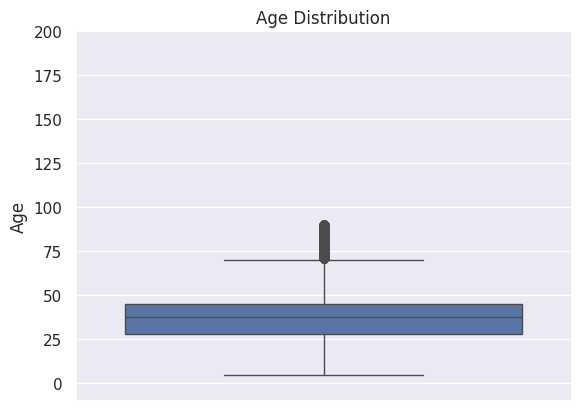

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
sns.boxplot(df['Age'])
print(str(df['Age'].max()))
plt.ylim(-10, 200)
plt.title(f'Age Distribution')
plt.show()


The frequencies of types of crime were graphed.  It was found that larceny is the most commonly reported crime, with roughly 140,000 records.

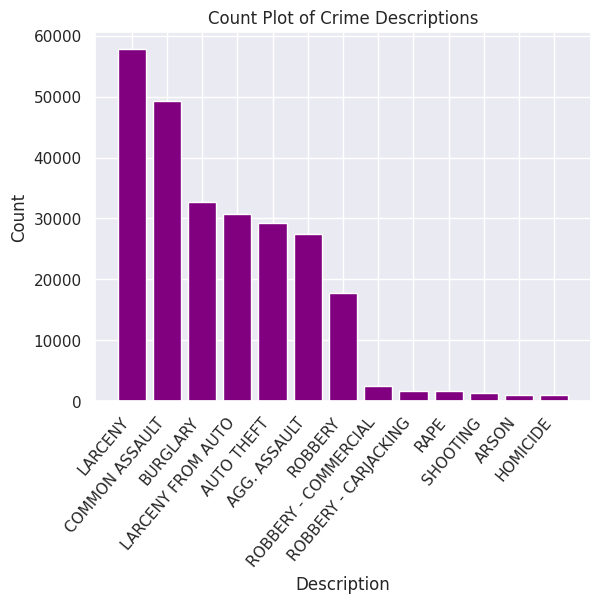

In [25]:
descrip_counts = df['Description'].value_counts()
sns.set(font_scale=1)
plt.bar(descrip_counts.index, descrip_counts, color='purple')
plt.title('Count Plot of Crime Descriptions')
plt.xlabel('Description')
plt.xticks(rotation=50, horizontalalignment='right')
plt.ylabel('Count')
plt.show()

A frequency analysis of the Race_Ethnicity column reflected the overall population of Baltimore; it revealed that Black or African Americans are reported more frequently across various crime categories in the dataset. This trend suggests a potential overrepresentation of this group in relation to the crimes reported.  A significant portion of the data does not have race or ethnicity reported, which makes this result less representative of the actual demographics for perpetrators.

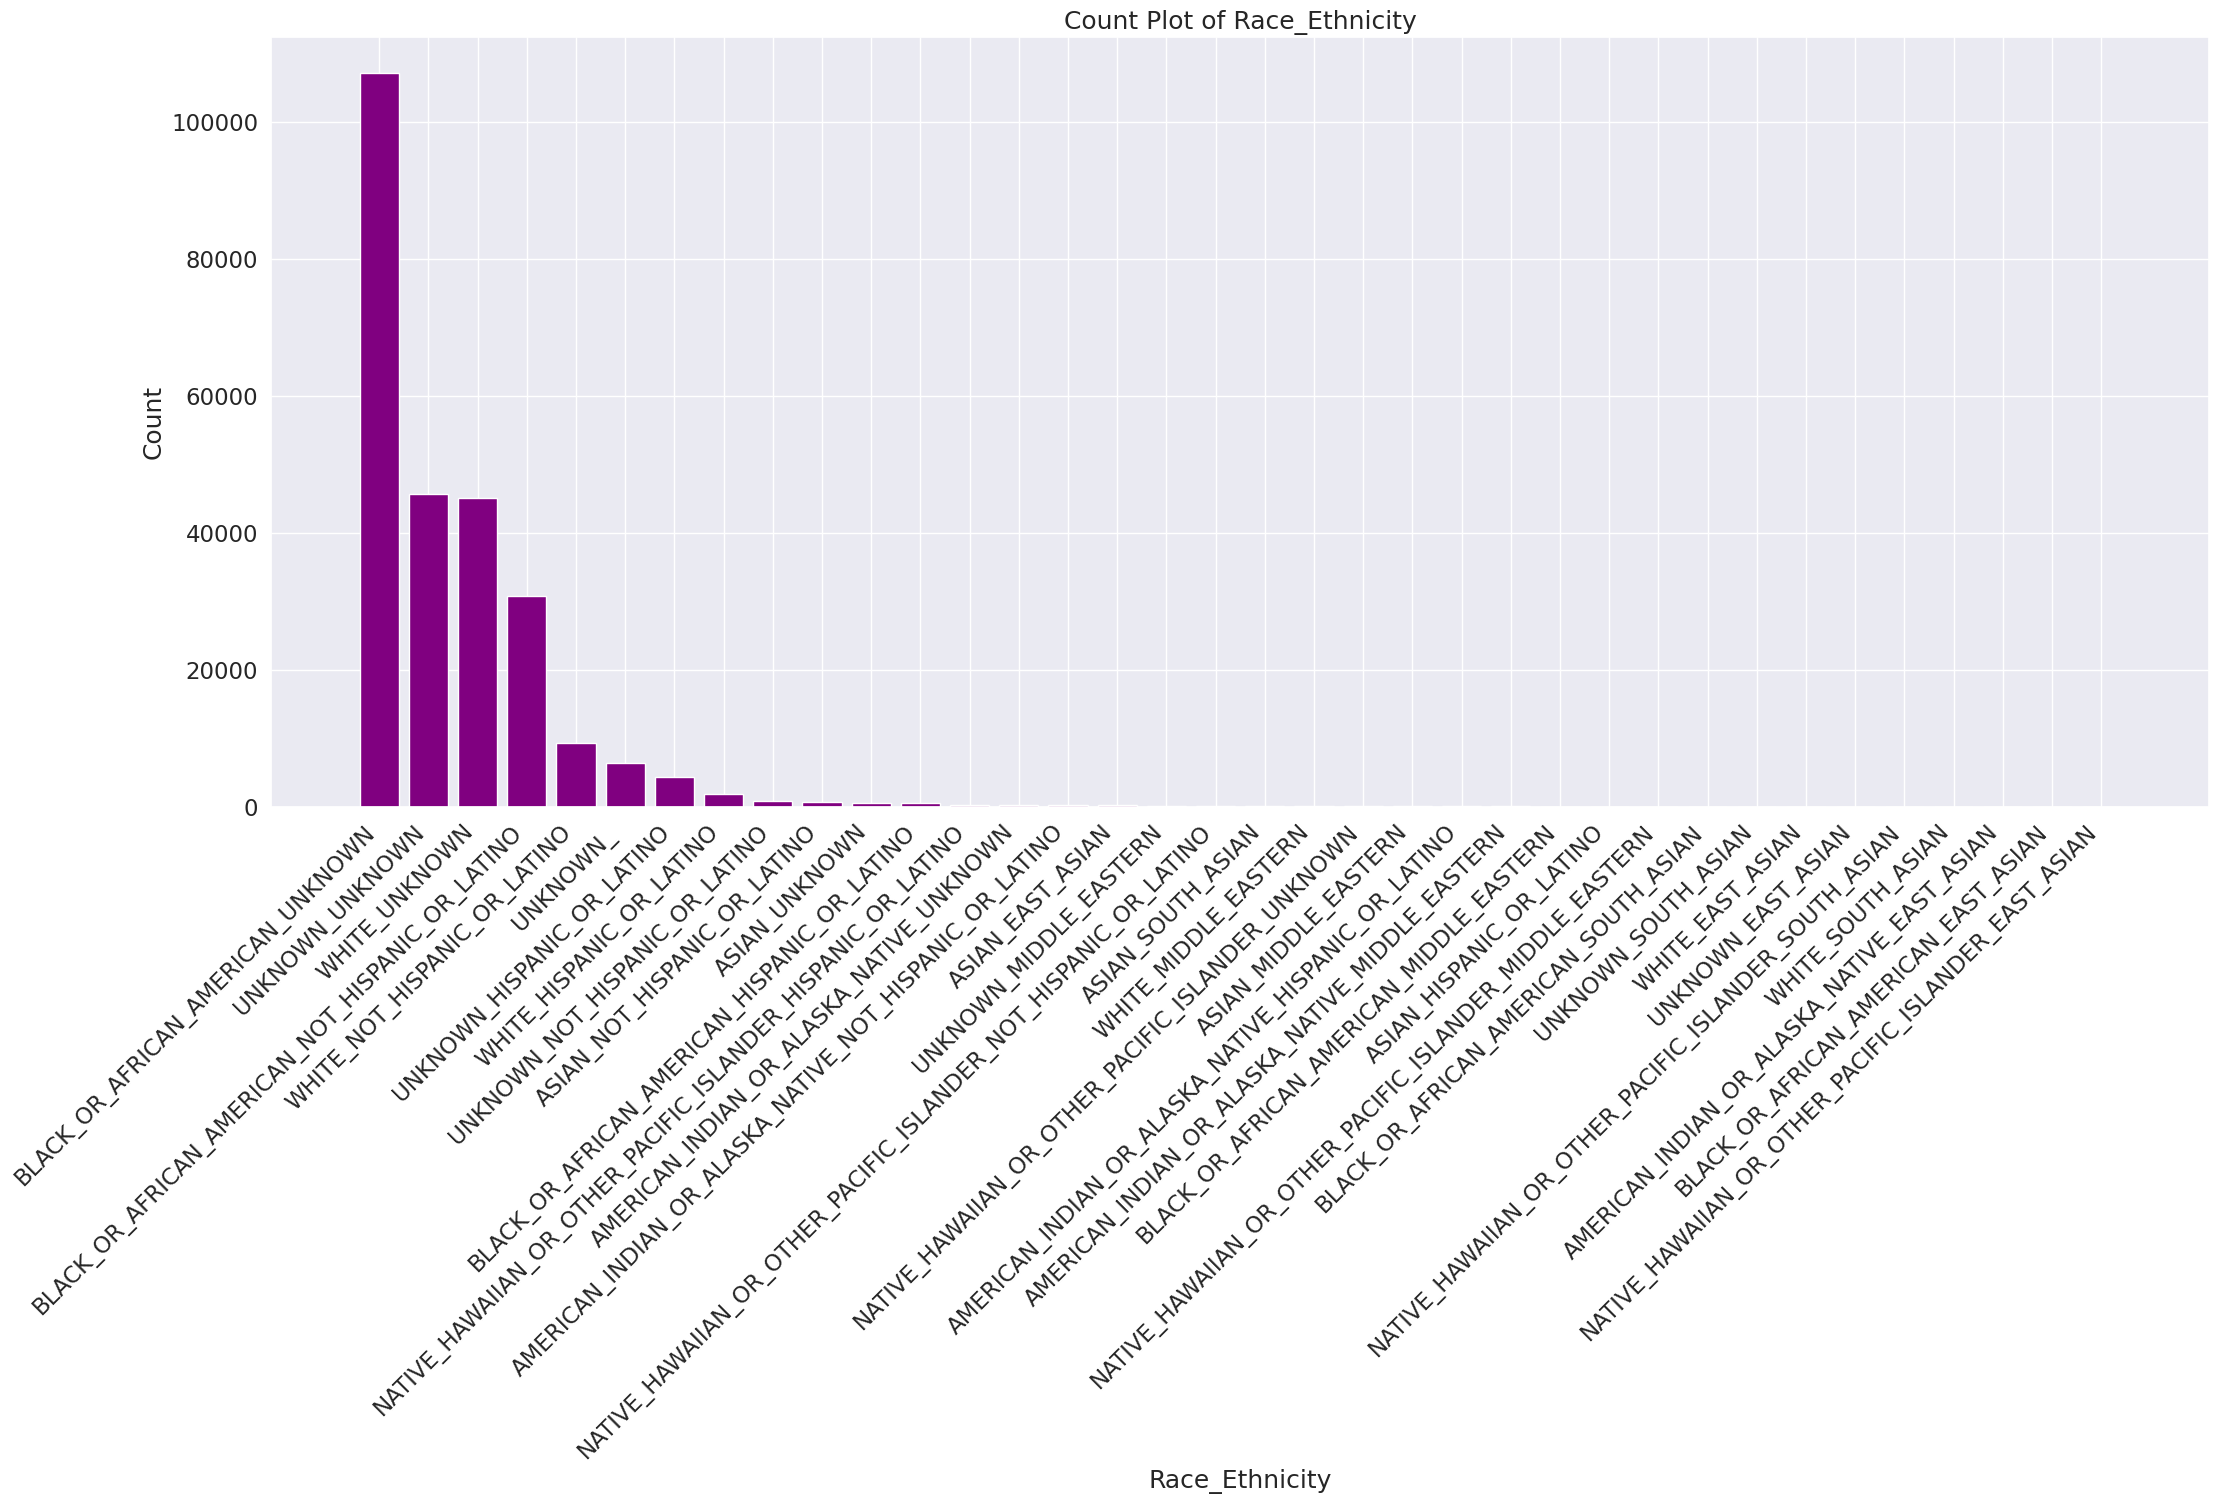

In [26]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25, 10))
# Counting the occurrences of each unique value in the 'Race_Ethnicity' column
race_ethnicity_counts = crime_data['Race_Ethnicity'].value_counts()

plt.bar(race_ethnicity_counts.index, race_ethnicity_counts, color='purple')
plt.title('Count Plot of Race_Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Count')

plt.show()

The graph shows the distribution of different racial groups (Race) across various crime descriptions in the dataset. Each bar represents a specific crime type, with the segments within the bars indicating the count of each racial group associated with that crime. The visualization helps identify which racial groups are more frequently associated with certain types of crime.

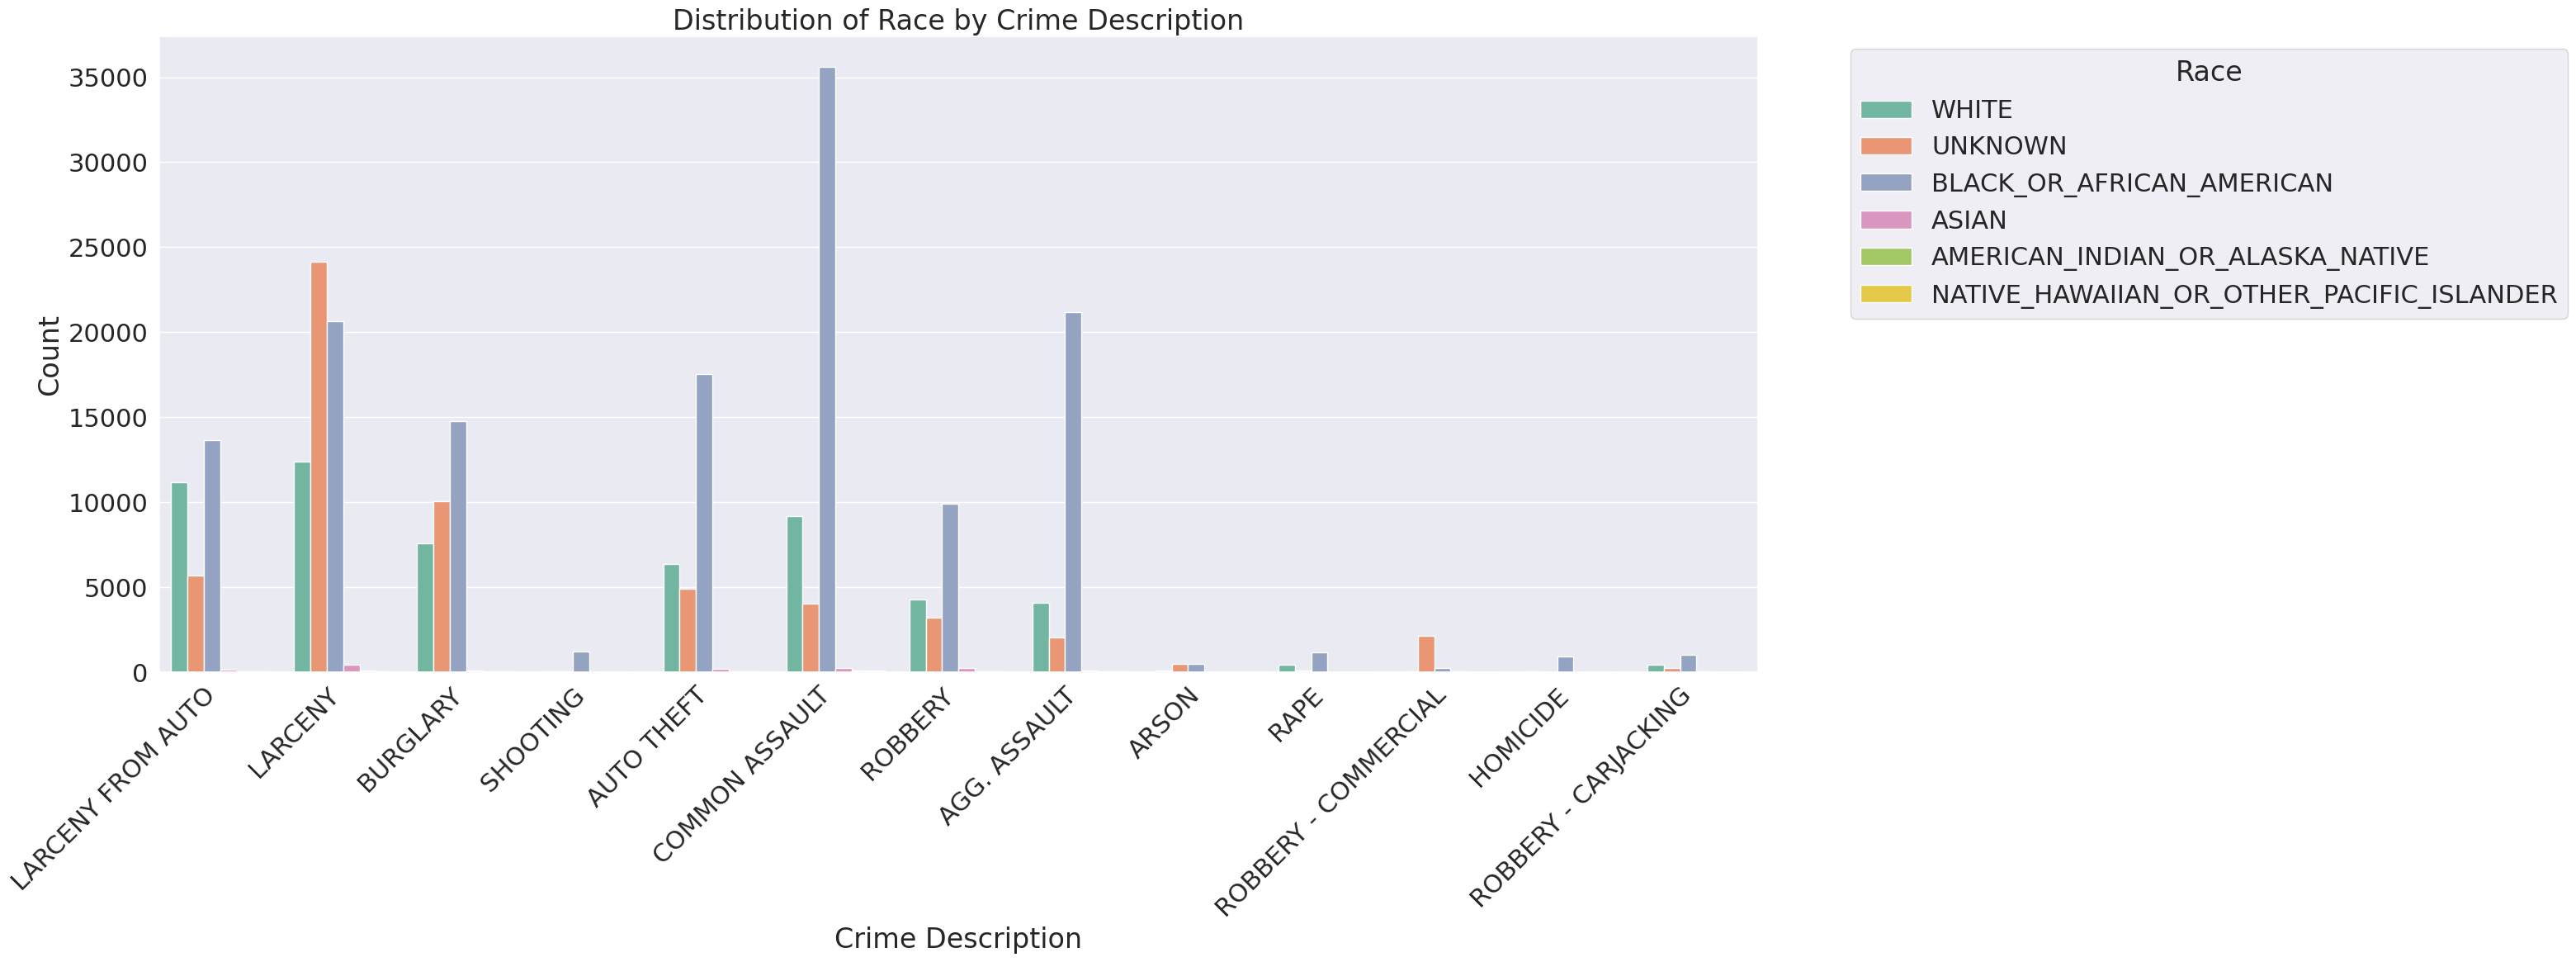

In [27]:
sns.set(font_scale=2)
plt.figure(figsize=(25, 10))
sns.countplot(x='Description', hue='Race', data=crime_data, palette='Set2')

plt.xticks(rotation=90)
plt.title('Distribution of Race by Crime Description')
plt.xlabel('Crime Description')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###Hypothesis Test 1: Chi-Squared Test
**Null Hypothesis:** The district where a crime was committed will have an impact of the likelihood of the nature (description) of the crime.<br />
**Alternate Hypothesis:** The district where a crime was committed will not have an impact of the likelihood of the nature (description) of the crime.<br />
For this test we used a Chi-Squared test, since both variables are categorical.

In [28]:
#Columns: district, description
contingency = pd.crosstab(df.District, df.Description)
contingency

Description,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,SHOOTING
District,,,,,,,,,,,,,
CENTRAL,2975,80,2467,2594,6352,76,9746,5209,213,2640,162,358,139
EASTERN,3023,95,2108,2564,5557,141,4310,2359,173,1367,127,168,159
NORTHEAST,3770,172,5895,5910,6864,132,7372,4168,241,2608,290,344,145
NORTHERN,2286,101,3098,4051,4232,87,7179,3589,177,1912,156,386,121
NORTHWEST,2893,132,3255,3782,4411,124,5382,2443,191,1810,268,305,106
SOUTHEAST,3201,99,3212,3922,6015,83,8542,6141,192,2637,168,366,121
SOUTHERN,3007,142,3656,3757,5646,100,7070,3407,203,1824,218,228,164
SOUTHWEST,2993,152,3036,3524,5000,126,4281,2017,158,1413,181,149,162
WESTERN,3332,130,2459,2539,5234,147,3895,1442,182,1550,183,194,220


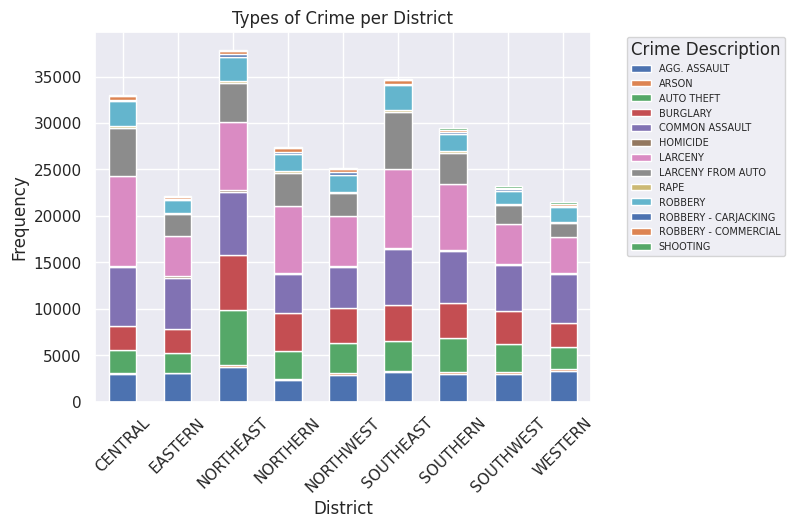

In [29]:
sns.set(font_scale=1)
plt = contingency.plot.bar(rot=45, title="Types of Crime per District", xlabel="District", ylabel="Frequency", stacked=True)
plt.legend(title="Crime Description", prop={'size': 7}, bbox_to_anchor=(1.4, 1.0), loc='upper right')

In [30]:
import scipy.stats as stats
chi2_res = stats.chi2_contingency(contingency)
if chi2_res.pvalue < 0.05:
  print("Reject, p-value is", str(chi2_res.pvalue))
else:
  print("Fail to Reject, p-value is", str(chi2_res.pvalue))

Reject, p-value is 0.0


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. District does not have a significant impact on the likelihood of the nature (description) of the crime.<br /><br />
###Hypothesis Test 2: ANOVA
**Null Hypothesis:** The description of the crime and the weapon used do not significantly impact one another.<br />
**Alternate Hypothesis:** The description of the crime and the weapon used do significantly impact one another.

In [31]:
import matplotlib.pyplot as plt

In [32]:
# Group by 'Description' and 'Weapon'
grouped_description_weapon = df.groupby(['Description', 'Weapon']).size().reset_index(name='Count')
print(grouped_description_weapon)

      Description                    Weapon  Count
0    AGG. ASSAULT              ASPHYXIATION    367
1    AGG. ASSAULT         AUTOMATIC_FIREARM     10
2    AGG. ASSAULT         AUTOMATIC_HANDGUN     11
3    AGG. ASSAULT           AUTOMATIC_RIFLE      6
4    AGG. ASSAULT              BLUNT_OBJECT   1742
..            ...                       ...    ...
131      SHOOTING  KNIFE_CUTTING_INSTRUMENT      2
132      SHOOTING                     OTHER      1
133      SHOOTING           PERSONAL_WEAPON      5
134      SHOOTING                     RIFLE      7
135      SHOOTING                   UNKNOWN      9

[136 rows x 3 columns]


To make both the largest and smallest value counts in this graph visible, the y axis was scaled logarithmically.

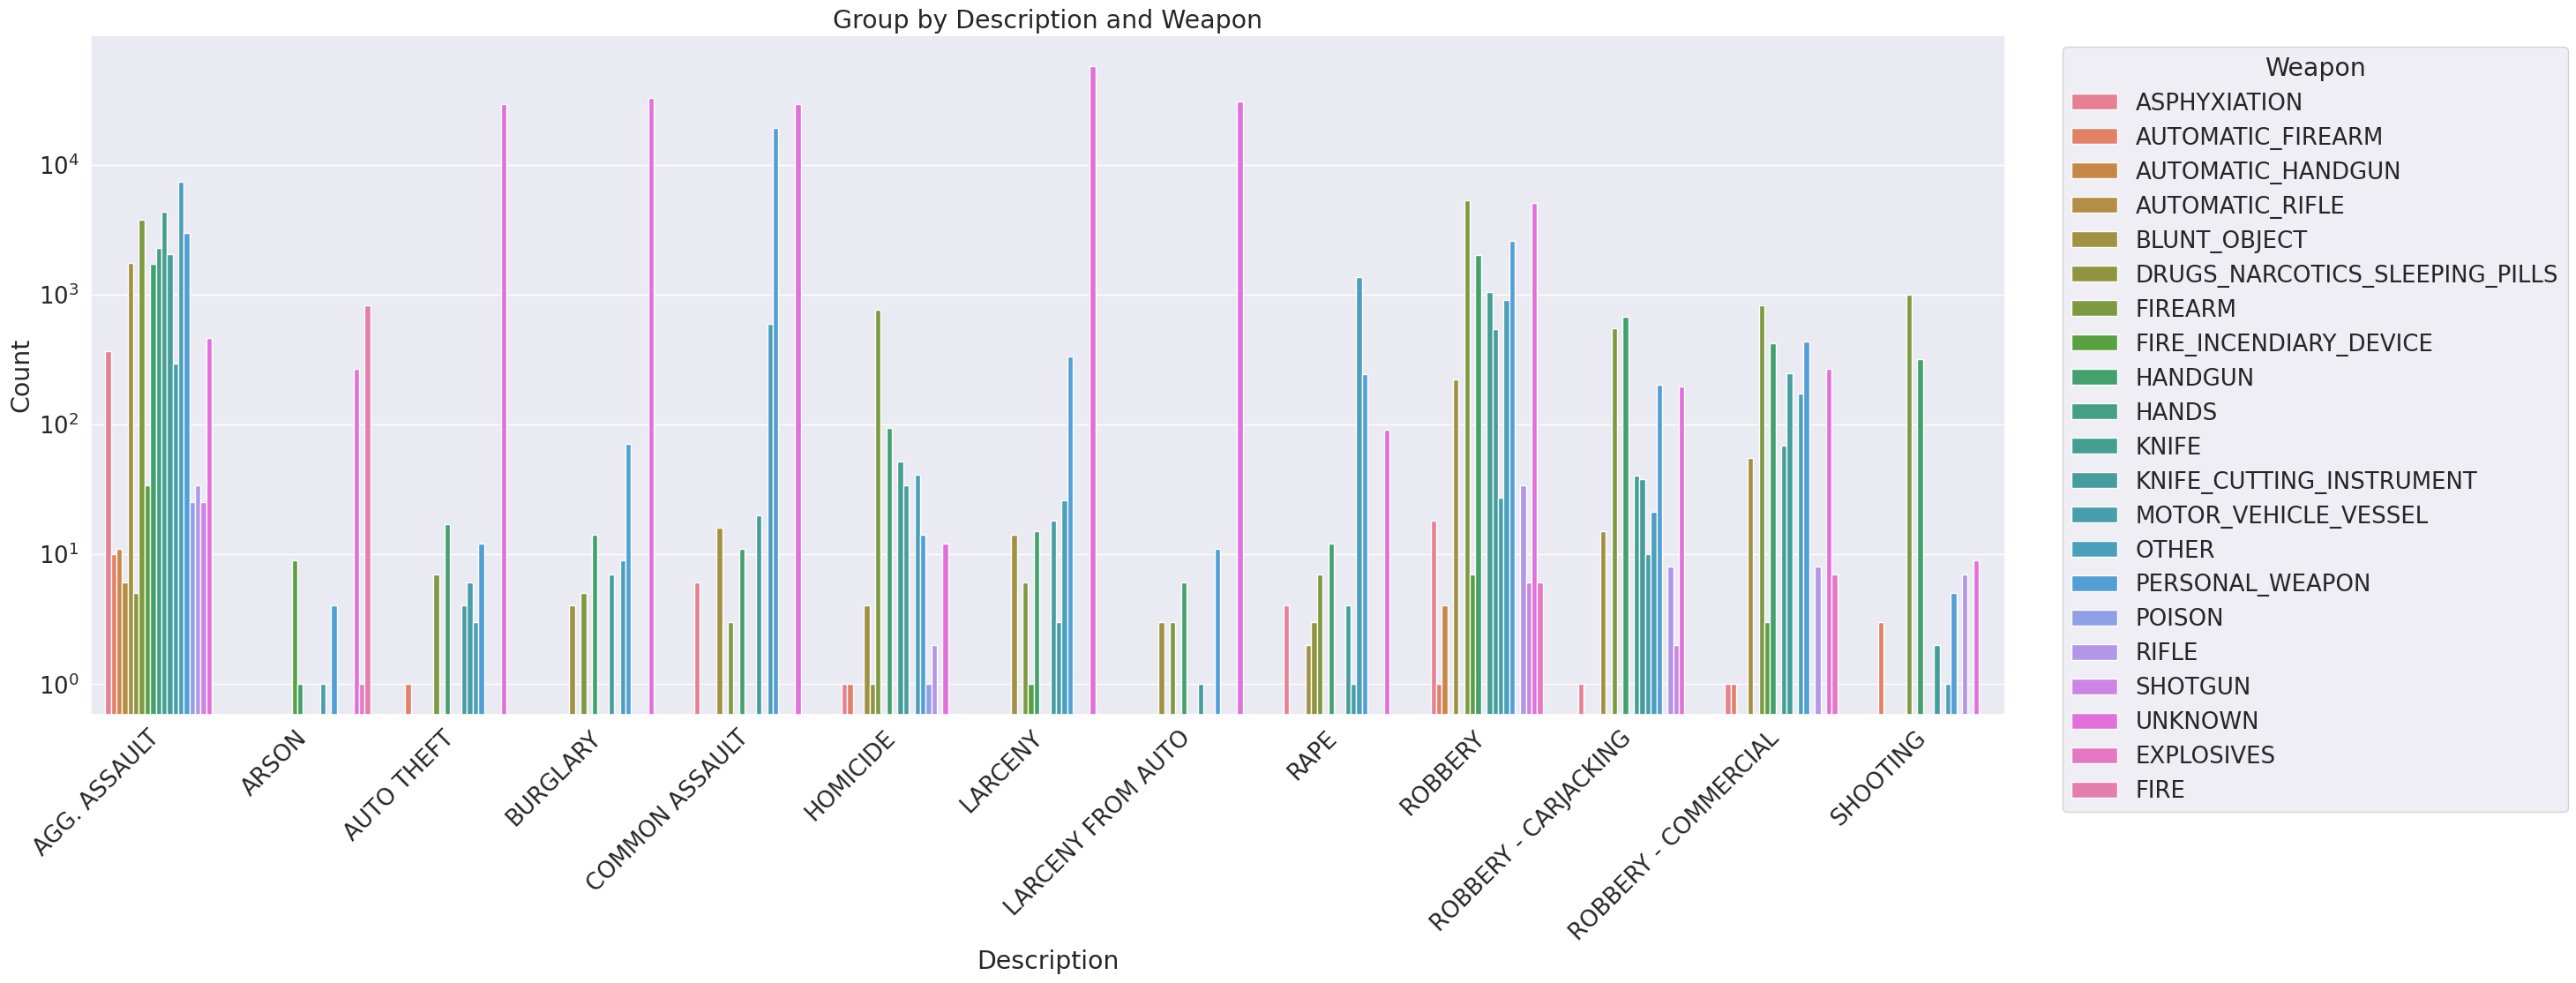

In [33]:
sns.set(font_scale=1.7)
plt.figure(figsize=(28, 10))
anovaplot = sns.barplot(x='Description', y='Count', hue='Weapon', data=grouped_description_weapon)

plt.title('Group by Description and Weapon')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('log')
#plt.margins(y=0.01)
plt.legend(title="Weapon", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [34]:
anova_data = [group['Count'].values for name, group in grouped_description_weapon.groupby('Description')]

#ANOVA
f_statistic, p_value = stats.f_oneway(*anova_data)

print("P-value:", p_value)

P-value: 0.38132602818789085


In [35]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Fail to reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. Therefore, The description of the crime and the weapon used do significantly impact one another.

###Hypothesis Test 2a:

###Hypothesis Test 3: T-Test
**Null Hypothesis:**  There is no difference in the average age of male and female perpetrators. <br>
**Alternate Hypothesis:** There is a difference in the average age of male and female perpetrators. <br>
A T-Test was used to determine whether gender has a significant impact on the likelihood of being a criminal perpetrator.

In [36]:
male_ages = df[(df['Gender'] == 'M')  & (df['Age'].notna())]['Age']
female_ages = df[(df['Gender'] == 'F')  & (df['Age'].notna())]['Age']
print(male_ages)
print(female_ages)

# t-test
t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)  # Use equal_var=False for Welch's t-test

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

113599    69
124187    24
127586    67
128389    38
152349    19
          ..
257975    20
257977    29
257979    29
257981    23
257982    67
Name: Age, Length: 102914, dtype: int64
152351    22
152353    30
152418    43
152420    36
152422    44
          ..
257961    25
257963    33
257966    44
257976    32
257978    38
Name: Age, Length: 112918, dtype: int64
T-statistic: 33.68665693435616
P-value: 4.1208986061687665e-248


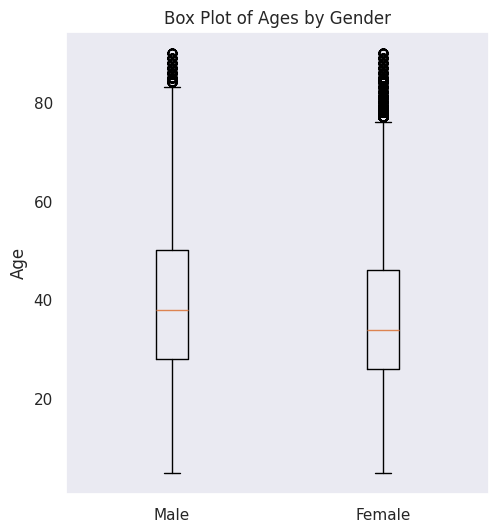

In [37]:
sns.set(font_scale=1)
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot([male_ages, female_ages], labels=['Male', 'Female'])
plt.title('Box Plot of Ages by Gender')
plt.ylabel('Age')
plt.grid()

plt.show()

In [38]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. The t-test shows that there is a significant difference in the average ages of male and female perpetrators in this data.

Comparing property crime rate to the rate of other crimes over time

# Primary Analysis
* We used a <strong>Classification</strong> machine learning technique to predict the type of crime based on various features in the dataset, such as location, weapon used, age of the individuals involved, and time of day. A Random Forest model was trained on certain features of the data to identify the relationships between these features and types of crimes. This helped us understand which features are most important in predicting crime types and how well we can categorize crimes based on these factors.<br><br>
* We applied a <strong>regression</strong> machine learning technique to predict future crime rates based on historical data. By training a regression model, such as linear regression, we estimated the relationship between features like the year, month, and crime count to forecast the number of crimes in future months. This approach provides insights into patterns and trends in specific areas, helping to identify factors that contribute most to crime rates and forecast potential increases or decreases over time.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

###Data Pre-processing for RandomForest Classifier
To train the RandomForest Classifier on the categorical data, each categorical feature being fed into the model needed to be encoded as ordinal numeric data.  We used manual ordinal encoding and assigned a number equivalent to the values in each column.  This was done by creating lists of the unique values in each column (for example, the list for 'Gender' would be ['F', 'M', 'U']), then mapping each value to the value's index in the column's list (for example, a 'F' value in the 'Gender' column would be assigned 0).

In [40]:
#categorical = ['Weapon', 'Post', 'Gender', 'Race', 'Ethnicity', 'District', 'Neighborhood', 'PremiseType']
# Create lists of unique values for each categorical column
weapons = df['Weapon'].unique().tolist()
posts = df['Post'].unique().tolist()
genders = df['Gender'].unique().tolist()
races = df['Race'].unique().tolist()
ethnicities = df['Ethnicity'].unique().tolist()
districts = df['District'].unique().tolist()
neighborhoods = df['Neighborhood'].unique().tolist()
premises = df['PremiseType'].unique().tolist()
descriptions = df['Description'].unique().tolist()

# On a copy of the dataframe, encode each categorical column according to the indexes of its unique values list
copydf = df.copy()
copydf['Weapon'] = copydf['Weapon'].apply(lambda x: weapons.index(x))
copydf['Post'] = copydf['Post'].apply(lambda x: posts.index(x))
copydf['Gender'] = copydf['Gender'].apply(lambda x: genders.index(x))
copydf['Race'] = copydf['Race'].apply(lambda x: races.index(x))
copydf['Ethnicity'] = copydf['Ethnicity'].apply(lambda x: ethnicities.index(x))
copydf['District'] = copydf['District'].apply(lambda x: districts.index(x))
copydf['Neighborhood'] = copydf['Neighborhood'].apply(lambda x: neighborhoods.index(x))
copydf['PremiseType'] = copydf['PremiseType'].apply(lambda x: premises.index(x))
copydf['Description'] = copydf['Description'].apply(lambda x: descriptions.index(x))

copydf.head(20)

,RowID,CCNumber,CrimeDateTime,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time,Race_Ethnicity
113599,113600,23L09396,2023-12-30 10:30:00,0,NaN,0,0,0,69,0,0,HARLEM AVE,0,0,"(39.296547,-76.644311)",0,2023-12-30,10:30:00,WHITE_NOT_HISPANIC_OR_LATINO
118487,118488,24C02405,2023-12-30 19:15:00,1,NaN,0,1,1,38,1,1,FALLS RD,1,1,"(39.332669,-76.635531)",1,2023-12-30,19:15:00,UNKNOWN_UNKNOWN
118872,118873,24A00141,2023-12-31 20:30:00,2,NaN,0,2,1,38,1,1,3900 PARK HEIGHTS AVE,1,2,"(39.333717,-76.661856)",2,2023-12-31,20:30:00,UNKNOWN_UNKNOWN
124187,124188,23L09308,2023-12-30 00:00:00,3,NaN,1,3,0,24,2,1,1800 MARYLAND AVE,2,3,"(39.309797,-76.617908)",0,2023-12-30,00:00:00,BLACK_OR_AFRICAN_AMERICAN_UNKNOWN
127586,127587,23L01699,2023-12-05 19:15:00,4,NaN,0,4,0,67,1,2,3100 PRESBURY ST,3,4,"(39.307006,-76.669954)",0,2023-12-05,19:15:00,UNKNOWN_HISPANIC_OR_LATINO
128389,128390,23L09503,2023-12-30 17:00:00,1,NaN,0,5,0,38,1,1,700 W LEXINGTON ST,4,5,"(39.29118339465587,-76.62990222120915)",0,2023-12-30,17:00:00,UNKNOWN_UNKNOWN
131288,131289,24A00398,2023-12-26 09:30:00,2,NaN,0,0,1,38,1,1,600 N CALHOUN ST,0,0,"(39.295453,-76.639844)",3,2023-12-26,09:30:00,UNKNOWN_UNKNOWN
152349,152350,24K08042,2024-11-22 12:00:00,1,I,0,6,0,19,2,0,2300 ARGONNE DR,5,6,"(39.339736,-76.578975)",4,2024-11-22,12:00:00,BLACK_OR_AFRICAN_AMERICAN_NOT_HISPANIC_OR_LATINO
152350,152351,24K06836,2024-11-22 09:00:00,5,I,2,7,0,43,0,0,2400 LIBERTY HEIGHTS AVE,0,7,"(39.31865,-76.653993)",5,2024-11-22,09:00:00,WHITE_NOT_HISPANIC_OR_LATINO
152351,152352,24K35674,2024-11-22 23:09:00,1,I,0,8,2,22,3,0,900 S WOLFE ST,6,8,"(39.281761,-76.589722)",6,2024-11-22,23:09:00,ASIAN_NOT_HISPANIC_OR_LATINO


To get the classifier to interpret the Date and Time columns, each column was split into smaller components that were representable by an integer.  For example, Date was split into Year, Month, and Day.

In [41]:
# Split 'Date' and 'Time' columns into subsections
copydf['Year'] = copydf['CrimeDateTime'].dt.year
copydf['Month'] = copydf['CrimeDateTime'].dt.month
copydf['Day'] = copydf['CrimeDateTime'].dt.day

copydf['Hour'] = copydf['CrimeDateTime'].dt.hour
copydf['Minute'] = copydf['CrimeDateTime'].dt.minute

copydf.head()

,RowID,CCNumber,CrimeDateTime,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time,Race_Ethnicity,Year,Month,Day,Hour,Minute
113599,113600,23L09396,2023-12-30 10:30:00,0,NaN,0,0,0,69,0,0,HARLEM AVE,0,0,"(39.296547,-76.644311)",0,2023-12-30,10:30:00,WHITE_NOT_HISPANIC_OR_LATINO,2023,12,30,10,30
118487,118488,24C02405,2023-12-30 19:15:00,1,NaN,0,1,1,38,1,1,FALLS RD,1,1,"(39.332669,-76.635531)",1,2023-12-30,19:15:00,UNKNOWN_UNKNOWN,2023,12,30,19,15
118872,118873,24A00141,2023-12-31 20:30:00,2,NaN,0,2,1,38,1,1,3900 PARK HEIGHTS AVE,1,2,"(39.333717,-76.661856)",2,2023-12-31,20:30:00,UNKNOWN_UNKNOWN,2023,12,31,20,30
124187,124188,23L09308,2023-12-30 00:00:00,3,NaN,1,3,0,24,2,1,1800 MARYLAND AVE,2,3,"(39.309797,-76.617908)",0,2023-12-30,00:00:00,BLACK_OR_AFRICAN_AMERICAN_UNKNOWN,2023,12,30,0,0
127586,127587,23L01699,2023-12-05 19:15:00,4,NaN,0,4,0,67,1,2,3100 PRESBURY ST,3,4,"(39.307006,-76.669954)",0,2023-12-05,19:15:00,UNKNOWN_HISPANIC_OR_LATINO,2023,12,5,19,15


In [42]:
for i in categorical:
  print(copydf[i].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0 1 2]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
['HARLEM AVE' 'FALLS RD' '3900 PARK HEIGHTS AVE' ... 'LONG ISLAND AVE'
 'KENWAY RD' 'YOSEMITE AVE']
[0 1 2 3 4 5 6 7 8]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 19

The features to train the model and the target variable for the model to predict were defined using the encoded dataframe, and this data and target were split into train and test sets.  

In [43]:
# Feature selection
print(df.columns)
features = ['Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'District', 'Neighborhood', 'PremiseType', 'Year', 'Month', 'Day', 'Hour', 'Minute']
X = copydf[features]
y = copydf['Description']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

Index(['RowID', 'CCNumber', 'CrimeDateTime', 'Description', 'Inside_Outside',
       'Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location',
       'District', 'Neighborhood', 'GeoLocation', 'PremiseType', 'Date',
       'Time', 'Race_Ethnicity'],
      dtype='object')


In [44]:
# Create instance of Random Forest Classifier and train it on the train dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## RandomForest Classifier Performance Analysis

In [45]:
# Get the classifier's predictions
y_pred = rf.predict(X_test)
# Print the accuracy of these predictions against y_test
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix for the model's predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6093092738923616
Confusion Matrix:
[[2949 1171  189    0 1387  386   13    2    0    0    1    0    0]
 [1147 7033 1377    0 1054  880   22    8    0    0   48    0    0]
 [  34 1615 3999    0   70  764    2    2    0    1    6    0    0]
 [   0    0    0   84    1    0    9  131    0    0    0   32    1]
 [1162 1120  209    0 3074  300    9    6    0    0    0    0    0]
 [ 500  746  784    0  141 7426   66  123    0    0    8    0    0]
 [ 179  205   72    8   84  909 1274  781    0    2   42    1    4]
 [   2   45   11  115   24  576  341 4381    0   30   15    5    5]
 [   3   17   10    0   11    1    0    3  185    0    1    0    0]
 [   0   12    1    0    3   53    3  150    0  128    0    0    0]
 [   0   43    8    0    3   19   53   28    0    0  368    0    0]
 [   0    3    0   44    2    0   23   55    0    0    0   73    0]
 [  17    3    1    1   13   32  171   99    0    0    3    4   24]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49      6098
           1       0.59      0.61      0.60     11569
           2       0.60      0.62      0.61      6493
           3       0.33      0.33      0.33       258
           4       0.52      0.52      0.52      5880
           5       0.65      0.76      0.70      9794
           6       0.64      0.36      0.46      3561
           7       0.76      0.79      0.77      5550
           8       1.00      0.80      0.89       231
           9       0.80      0.37      0.50       350
          10       0.75      0.70      0.73       522
          11       0.63      0.36      0.46       200
          12       0.71      0.07      0.12       368

    accuracy                           0.61     50874
   macro avg       0.65      0.52      0.55     50874
weighted avg       0.61      0.61      0.60     50874



The classification report on the RandomForest model's performance returned that the model predicted the type of crime for the test dataset with 59% accuracy.

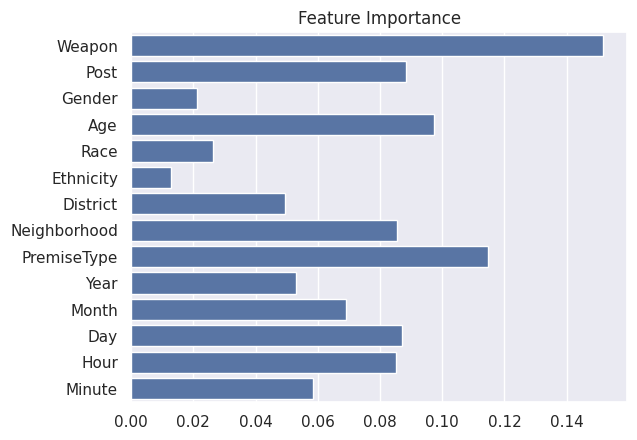

In [47]:
feature_importance = rf.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()

The data features that the model used to make predictions were measured on their importance - how much they contributed in making the most confident classifications.  Specifically, a very important feature creates the most pure/optimal split for the decision trees that make up a Random Forest model.  The 'Weapon' feature was the most important feature in this regard for increasing the model's accuracy in predicting types of crime.

##Data Processing for Regression ML
Below is essential code for preparing our dataset for analysis. It processes the crime data by first extracting the year and month from the 'Date' column and then grouping the data by neighborhood, year, and month to calculate the total crime count for each group. It then filters the data to include only the year 2024 and aggregates the total crime count for each month across all neighborhoods to prepare it for future prediction modeling.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Creating a target variable
crime_data['Date'] = pd.to_datetime(crime_data['Date'])
crime_data['Year'] = crime_data['Date'].dt.year
crime_data['Month'] = crime_data['Date'].dt.month

# Group by neighborhood and year-month to count incidents
grouped_data = crime_data.groupby(['Neighborhood', 'Year', 'Month']).size().reset_index(name='Crime_Count')
print(grouped_data)

# Filtering data to include only the year 2023 (note we could add more years)
filtered_data = grouped_data[grouped_data['Year'] == 2023]
print("Filtered Data (from 2024 to predict 2025 onwards):")
print(filtered_data)

# Aggregating crime count across all neighborhoods by Year and Month
total_crime_data = filtered_data.groupby(['Year', 'Month'])['Crime_Count'].sum().reset_index()
print("Aggregated Total Crime Data:")
print(total_crime_data)

        Neighborhood  Year  Month  Crime_Count
0              ABELL  2011      1           10
1              ABELL  2011      2            5
2              ABELL  2011      3            6
3              ABELL  2011      4            5
4              ABELL  2011      5            5
...              ...   ...    ...          ...
20223  YORK-HOMELAND  2024      7            2
20224  YORK-HOMELAND  2024      8            2
20225  YORK-HOMELAND  2024      9            2
20226  YORK-HOMELAND  2024     10            4
20227  YORK-HOMELAND  2024     11            4

[20228 rows x 4 columns]
Filtered Data (from 2024 to predict 2025 onwards):
        Neighborhood  Year  Month  Crime_Count
54             ABELL  2023      1            3
55             ABELL  2023      2            8
56             ABELL  2023      3            5
57             ABELL  2023      4            7
58             ABELL  2023      5            9
...              ...   ...    ...          ...
20212  YORK-HOMELAND  2023    

We split the datasets into training and testing subsets using the train_test_split function from sklearn. This step is essential for preparing the data for linear regression modeling, as it allows us to train our models on one set and evaluate their performance on a separate, unseen set. For this analysis, we used the crime count data for each month of the year 2024.

In [63]:
# Preparing features and target for regression
X = total_crime_data[['Year', 'Month']]  # Features
Y = total_crime_data['Crime_Count']     # Target: total crime count

random_state = 42
np.random.seed(random_state)
test_size = 0.2

def split_data(X, Y, test_size=test_size, random_state=random_state):
    return train_test_split(X, Y, test_size=test_size, random_state=random_state)

# Train-test split
X_train, X_test, Y_train, Y_test = split_data(X, Y)

# Fit and transform the training and testing target variable
scaler = MinMaxScaler()
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test = scaler.transform(Y_test.values.reshape(-1, 1))

Now, let's visualize our split dataset.

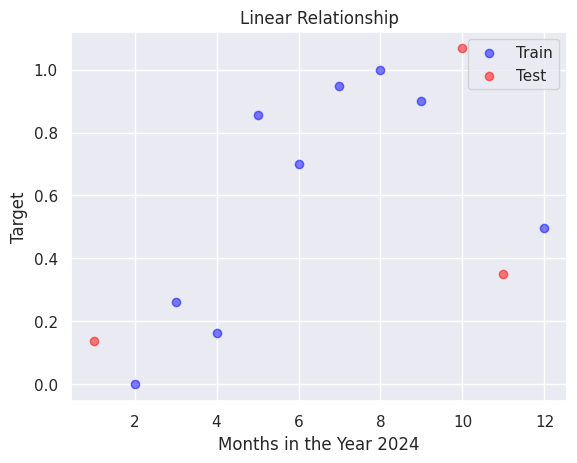

In [64]:
# Scatter plot function
def draw_scatter(X_train, Y_train, X_test, Y_test, title, xlabel='Feature', ylabel='Target'):
    plt.scatter(X_train['Month'], Y_train, color='blue', label='Train', alpha=0.5)
    plt.scatter(X_test['Month'], Y_test, color='red', label='Test', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plotting the dataset with 'Year' as the feature
draw_scatter(X_train, Y_train, X_test, Y_test, 'Linear Relationship', xlabel='Months in the Year 2024')

First, we fit the model on the training data, then made predictions for both the training and test sets. We used the predictions from the training set for plotting, and the predictions from the test set for evaluation.

In [65]:
# Function to fit the model
def fit_model(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

# Function to predict using the fitted model
def predict_data(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

# Fitting the model for our dataset and predict
linear_model = fit_model(X_train, Y_train)
Y_train_pred, Y_test_pred = predict_data(linear_model, X_train, X_test)


Now, let's visualize and plot below.

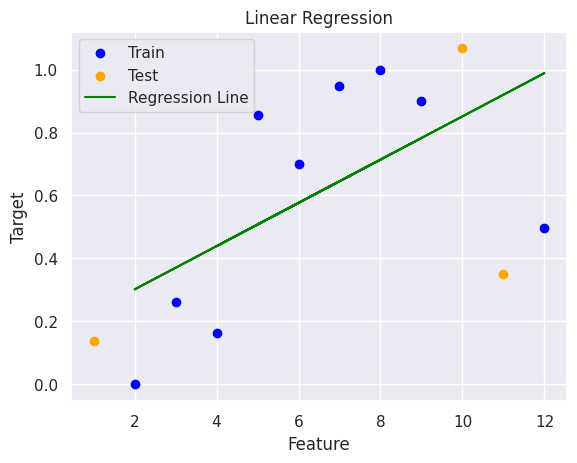

In [67]:
# Function to draw scatter plot with regression line
def draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title, xlabel='Feature', ylabel='Target'):
    plt.scatter(X_train['Month'], Y_train, color='blue', label='Train')
    plt.scatter(X_test['Month'], Y_test, color='orange', label='Test')
    plt.plot(X_train['Month'], Y_train_pred, color='green', label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plotting the selected dataset with regression line
draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, 'Linear Regression')

## Linear Regression Model Performance Analysis
We calculated the Mean Squared Error (MSE) and $R^2$ coefficient for each training and test split.

In [69]:
# Function to calculate MSE and R^2
def evaluate_model(Y_train, Y_train_pred, Y_test, Y_test_pred):
    # Calculating MSE
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)

    # Calculating R^2
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)

    return mse_train, mse_test, r2_train, r2_test

mse_train, mse_test, r2_train, r2_test = evaluate_model(
    Y_train, Y_train_pred, Y_test, Y_test_pred)

In [70]:
# Function to store and display results
def store_and_display_results(mse_train, mse_test, r2_train, r2_test):
    print(f"  MSE Train: {mse_train:.4f}")
    print(f"  MSE Test: {mse_test:.4f}")
    print(f"  R2 Train: {r2_train:.4f}")
    print(f"  R2 Test: {r2_test:.4f}")
    print()

print("Results")
store_and_display_results(mse_train, mse_test, r2_train, r2_test)

Results
  MSE Train: 0.0826
  MSE Test: 0.1270
  R2 Train: 0.3356
  R2 Test: 0.1958



The results of our analysis provide insight into the model's predictive capabilities. The Mean Squared Error (MSE) values for both training (0.0826) and testing (0.1270) indicate small, interpretable errors when scaled, suggesting that the model is reasonably consistent in its predictions. However, the $R^2$ scores (0.3356 for training and 0.1958 for testing) reveal limited explanatory power, meaning the model captures only a small proportion of the variation in the data. These results suggest the model has weak performance and leaves substantial room for improvement. Enhancing the model's ability to generalize and predict effectively may require advanced techniques, such as polynomial regression or feature engineering, to address the complexity of the data and improve accuracy.

## Implementing Polynomial Regression Models
We experimented with whether using a Polynomial model would result in a more accurate regression for the data.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Function to fit the polynomial model
def fit_model_poly(X_train, Y_train, degree):
    # PolyFeat allows us to include polynomial terms based on degree term
    # and make_pipeline create that connection/pipe with linearReg to PolyReg.
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, Y_train)
    return model

# Function to predict using the fitted polynomial model
def predict_data_poly(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

# Define degrees for polynomial features
degree_linear = 1

# Fit and predict for the linear dataset
linear_model_poly = fit_model_poly(X_train, Y_train, degree_linear)
Y_linear_train_pred_poly, Y_linear_test_pred_poly = predict_data_poly(linear_model_poly, X_train, X_test)

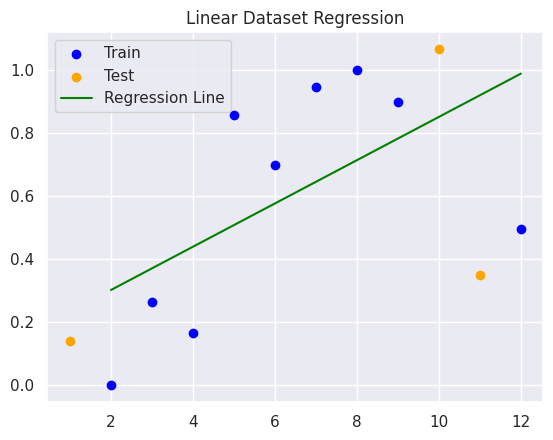

In [72]:
# Function to plot dataset with regression line
def plot_dataset_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title):
    X_train_np = X_train['Month'].to_numpy()
    X_test_np = X_test['Month'].to_numpy()

    Y_train_np = Y_train.ravel()
    Y_test_np = Y_test.ravel()
    Y_train_pred_np = Y_train_pred.ravel()

    sorted_idx = np.argsort(X_train_np)

    plt.scatter(X_train_np, Y_train_np, color='blue', label='Train')
    plt.scatter(X_test_np, Y_test_np, color='orange', label='Test')
    plt.plot(X_train_np[sorted_idx], Y_train_pred_np[sorted_idx], color='green', label='Regression Line')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting the selected dataset with regression line
plot_dataset_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, 'Linear Dataset Regression')

Let us calculate the scores again.

In [73]:
# Calculating values for datasets
mse_train_poly, mse_test_poly, r2_train_poly, r2_test_poly = evaluate_model(
    Y_train, Y_linear_train_pred_poly, Y_test, Y_linear_test_pred_poly)

print("Linear Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_train_poly:.4f}, R^2: {r2_train_poly:.4f}")
print(f"Test - MSE: {mse_test_poly:.4f}, R^2: {r2_test_poly:.4f}\n")

Linear Dataset with Polynomial Features:
Train - MSE: 0.0826, R^2: 0.3356
Test - MSE: 0.1270, R^2: 0.1958



Our results after applying a polynomial regression model showed no improvement, indicating the model's limitations in capturing the complexity of the data. The Mean Squared Error (MSE) values for both training (0.0826) and testing (0.1270) remained consistent, suggesting stable but insufficient predictive accuracy. Similarly, the $R^2$ scores (0.3356 for training and 0.1958 for testing) revealed that the model still explains only a small portion of the variability in the data. These findings highlight that using only the crime count per month in 2023 as a feature is insufficient for accurate predictions.

To improve performance, it is essential to incorporate additional data and explore other relevant features. For example, including the time of day as a feature could provide valuable insights into temporal patterns of criminal activity, helping the model better capture the factors influencing crime trends. Enhancing the feature set and exploring other modeling techniques will be key to developing a more effective predictive model.

#Insights and Conclusions